  Using cached skimage-0.0.tar.gz (757 bytes)
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\46722\anaconda3\envs\DNN\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\46722\\AppData\\Local\\Temp\\pip-install-nz9f5dad\\skimage\\setup.py'"'"'; __file__='"'"'C:\\Users\\46722\\AppData\\Local\\Temp\\pip-install-nz9f5dad\\skimage\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\46722\AppData\Local\Temp\pip-pip-egg-info-cu_jnwl4'
         cwd: C:\Users\46722\AppData\Local\Temp\pip-install-nz9f5dad\skimage\
    Complete output (3 lines):
    
    *** Please install the `scikit-image` package (instead of `skimage`) ***
    
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


Max value in the x_train is 255
Min value in the x_train is 0
(60000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
<class 'numpy.ndarray'>
Max value in the x_train is 0.003921569
Min value in the x_train is 0.0
Max value in the x_train_noisy is 0.004693421353733053
Min value in the x_train_noisy is -0.0014390789639377075


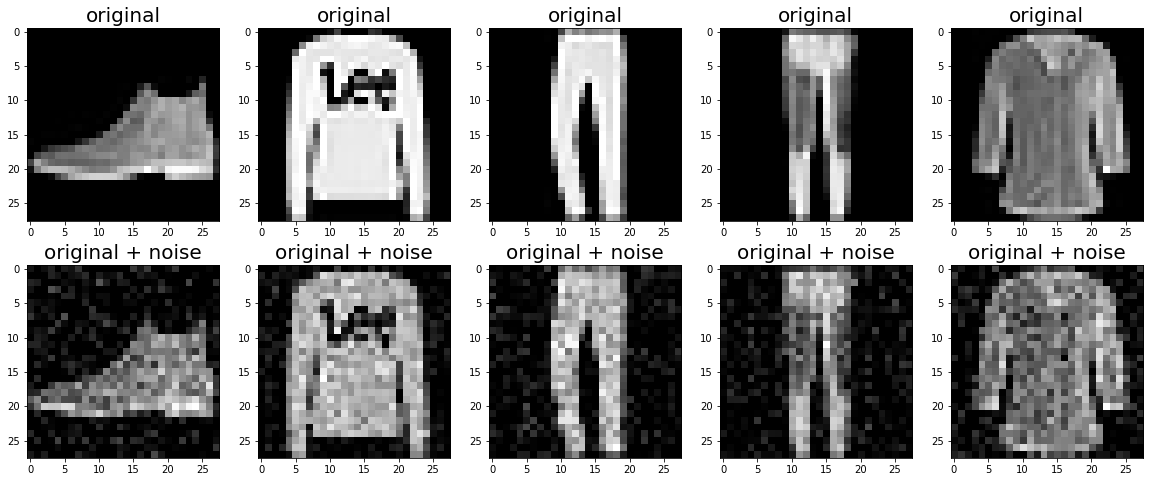

In [8]:
#Deep conv autoencoders https://towardsdatascience.com/image-noise-reduction-in-10-minutes-with-convolutional-autoencoders-d16219d2956a

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

%pip install skimage
from skimage.util import random_noise

# We don't need y_train and y_test
(x_train, _), (x_test, _) = fashion_mnist.load_data()
print('Max value in the x_train is', x_train[0].max())
print('Min value in the x_train is', x_train[0].min())

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


import matplotlib.pyplot as plt

"""
fig, axs = plt.subplots(5, 10) 
fig.tight_layout(pad=-1)
plt.gray()
a = 0 
for i in range(5): 
  for j in range(10): 
    axs[i, j].imshow(tf.squeeze(x_test[a])) 
    axs[i, j].xaxis.set_visible(False) 
    axs[i, j].yaxis.set_visible(False) 
    a = a + 1 
"""

#add noise 
print(x_train.shape)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)
print(x_test.shape)

print(type(x_test))

#print(tf.random.normal(shape=x_train.shape,mean=0.0, stddev=0.5)[1])

noise_factor = 1
#x_train_noisy = x_train+noise_factor*tf.random.normal(shape=x_train.shape,mean=0.0, stddev=0.1) #
#x_test_noisy = x_test+noise_factor*tf.random.normal(shape=x_test.shape,mean=0.0, stddev=0.1)

print('Max value in the x_train is', x_train[0].max())
print('Min value in the x_train is', x_train[0].min())

x_train_noisy = np.random.normal(0, 0.0005, x_train.shape)
x_test_noisy = np.random.normal(0, 0.0005, x_test.shape)

x_train_noisy += x_train
x_test_noisy += x_test 


print('Max value in the x_train_noisy is', x_train_noisy[0].max())
print('Min value in the x_train_noisy is', x_train_noisy[0].min())

#print(x_test_noisy[1])

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) 
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

n = 5
plt.figure(figsize=(20, 8))
plt.gray()
for i in range(n):
  ax = plt.subplot(2, n, i + 1) 
  plt.title("original", size=20) 
  plt.imshow(tf.squeeze(x_test[i])) 
  plt.gray() 
  bx = plt.subplot(2, n, n+ i + 1) 
  plt.title("original + noise", size=20) 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
plt.show()

In [9]:
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input

class NoiseReducer(tf.keras.Model): 
  def __init__(self):

    super(NoiseReducer, self).__init__() 

    self.encoder = tf.keras.Sequential([ 
      Input(shape=(28, 28, 1)), 
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2), 
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)]) 
    
    self.decoder = tf.keras.Sequential([ 
      Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'), 
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'), 
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')]) 
  
  def call(self, x): 
    encoded = self.encoder(x) 
    decoded = self.decoder(encoded) 
    return decoded

In [10]:
autoencoder = NoiseReducer()

autoencoder.compile(optimizer='adam', loss='mse')


autoencoder.fit(x_train_noisy, 
                x_train, 
                epochs=10, 
                shuffle=True, 
                validation_data=(x_test_noisy, x_test))

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1875/1875 [==============================] - 48s 26ms/step - loss: 0.0051 - val_loss: 3.2461e-06 0s -
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 3.2057e-06 - val_loss: 3.1880e-06
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 3.1819e-06 - val_loss: 3.1794e-06
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 3.1772e-06 - val_loss: 3.1771e-06
Epoch 5/10
1875/1875 [==============================] - 45s

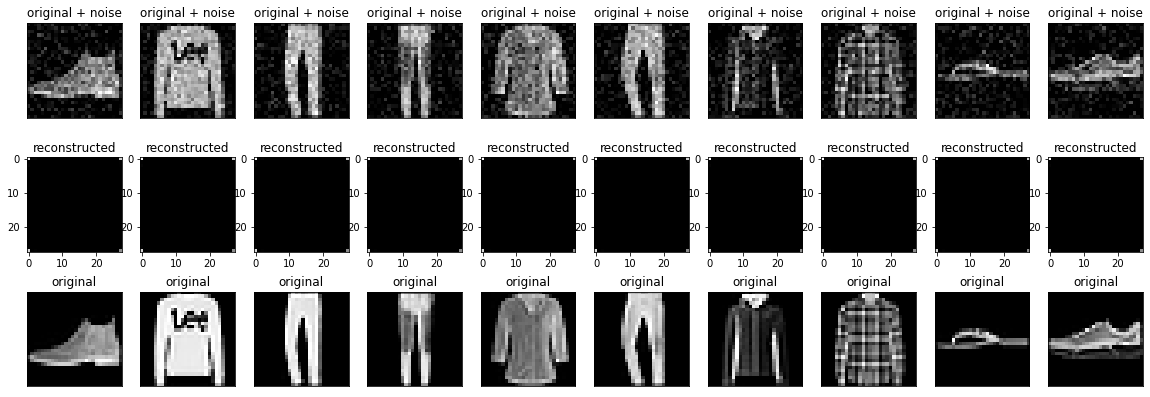

In [11]:
encoded_imgs=autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  bx = plt.subplot(3, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  cx = plt.subplot(3, n, i + n + 1) 
  plt.title("reconstructed") 
  plt.imshow(tf.squeeze(decoded_imgs[i])) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
  # display original 
  ax = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(x_test[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 

plt.show()